In [228]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [229]:
SAMPLES = 10 ** 7

In [230]:
buyer_mean = 2
buyer_values = np.random.normal(loc=buyer_mean, size=SAMPLES)
seller_values = np.random.normal(size=SAMPLES)

In [231]:
prices = np.arange(min(buyer_mean, 0) - 1, max(0, buyer_mean) + 1.1, 0.1)

In [232]:
value_difference = buyer_values - seller_values
optimal_gain_from_trade = np.where(value_difference < 0, 0, value_difference)
probability_of_trade_happening = np.sum(optimal_gain_from_trade > 0) / len(optimal_gain_from_trade)
probability_of_trade_happening

0.9213532

In [233]:
expected_optimal_gain_from_trade = np.average(optimal_gain_from_trade)
expected_optimal_gain_from_trade

2.0503099079560285

In [234]:
gain_from_mechs = {}

for p in prices:
    buyer_more_than_p = buyer_values >= p 
    seller_less_than_p = seller_values <= p
    accepted_by_mech = np.logical_and(buyer_more_than_p, seller_less_than_p)
    gain_from_mechs[p] = buyer_values[accepted_by_mech] - seller_values[accepted_by_mech] 
    gain_from_mechs[p] = np.pad(gain_from_mechs[p], (0, SAMPLES - np.sum(accepted_by_mech)), mode="constant", constant_values=0)

visualise_results = []

for price, v in gain_from_mechs.items():
    average_gain_from_trade = np.average(v)
    ratio_of_expected_gain = expected_optimal_gain_from_trade / average_gain_from_trade
    visualise_results.append((price, ratio_of_expected_gain))
    print("Price:", price, "Average gain:", average_gain_from_trade, "Approximation to optimal", ratio_of_expected_gain)

Price: -1.0 Average gain: 0.5592638801055996 Approximation to optimal 3.66608676313745
Price: -0.9 Average gain: 0.634154167350459 Approximation to optimal 3.2331411090813584
Price: -0.8 Average gain: 0.7133918652571364 Approximation to optimal 2.874030400132206
Price: -0.7000000000000001 Average gain: 0.7958905555129623 Approximation to optimal 2.576120414740411
Price: -0.6000000000000001 Average gain: 0.8813238199536603 Approximation to optimal 2.3263979272270583
Price: -0.5000000000000001 Average gain: 0.9686834799957976 Approximation to optimal 2.1165942749069315
Price: -0.40000000000000013 Average gain: 1.056830834604124 Approximation to optimal 1.9400549651109014
Price: -0.30000000000000016 Average gain: 1.1446993802672283 Approximation to optimal 1.7911339372590442
Price: -0.20000000000000018 Average gain: 1.2306628705364833 Approximation to optimal 1.6660207738795567
Price: -0.1000000000000002 Average gain: 1.314207168726782 Approximation to optimal 1.560111645063077
Price: -2.

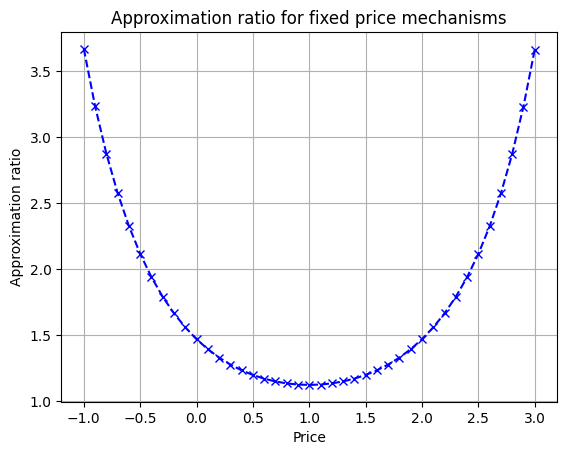

In [238]:
x, y = zip(*visualise_results)
plt.plot(x, y,  marker='x', linestyle='--', color='b')

plt.xlabel('Price')
plt.ylabel('Approximation ratio')
plt.title('Approximation ratio for fixed price mechanisms')

#plt.yscale('log')

# asymptotically_optimal = math.log(1 / probability_of_trade_happening) 
# plt.axhline(y=asymptotically_optimal, color='red', linestyle='--', linewidth=2, label='Asymptotically optimal')

plt.grid(True)
plt.show()